In [6]:
!wget -nc https://www.census.gov/econ/cfs/2012/cfs_2012_pumf_csv.zip
!wget -nc https://www.census.gov/econ/cfs/AboutGeographyFiles/CFS_AREA_shapefile_010215.zip
    
!unzip -o cfs_2012_pumf_csv.zip
!unzip -o CFS_AREA_shapefile_010215.zip

File ‘cfs_2012_pumf_csv.zip’ already there; not retrieving.

File ‘CFS_AREA_shapefile_010215.zip’ already there; not retrieving.

Archive:  cfs_2012_pumf_csv.zip
  inflating: cfs_2012_pumf_csv.txt   
Archive:  CFS_AREA_shapefile_010215.zip
  inflating: CFS_AREA_shapefile_010215.cpg  
  inflating: CFS_AREA_shapefile_010215.dbf  
  inflating: CFS_AREA_shapefile_010215.prj  
  inflating: CFS_AREA_shapefile_010215.sbn  
  inflating: CFS_AREA_shapefile_010215.sbx  
  inflating: CFS_AREA_shapefile_010215.shp  
  inflating: CFS_AREA_shapefile_010215.shp.xml  
  inflating: CFS_AREA_shapefile_010215.shx  


In [1]:
import pandas as pd
puma = pd.read_csv("cfs_2012_pumf_csv.txt")
puma.head()

,SHIPMT_ID,ORIG_STATE,ORIG_MA,ORIG_CFS_AREA,DEST_STATE,DEST_MA,DEST_CFS_AREA,NAICS,QUARTER,SCTG,MODE,SHIPMT_VALUE,SHIPMT_WGHT,SHIPMT_DIST_GC,SHIPMT_DIST_ROUTED,TEMP_CNTL_YN,EXPORT_YN,EXPORT_CNTRY,HAZMAT,WGT_FACTOR
0,1,25,148,25-148,25,148,25-148,333,2,35,14,2178,11,14,17,N,N,N,N,208.5
1,2,42,428,42-428,6,41740,06-41740,311,3,35,14,344,11,2344,2734,N,N,N,N,193.3
2,3,26,220,26-220,47,314,47-314,322,2,27,4,4197,5134,470,579,N,N,N,N,51.2
3,4,20,556,20-556,20,556,20-556,323,1,29,4,116,6,3,3,N,N,N,N,238.7
4,5,12,99999,12-99999,12,99999,12-99999,4235,3,33,5,388,527,124,201,N,N,N,N,398.1


In [3]:
import geopandas as gpd
tracts = gpd.read_file("CFS_AREA_shapefile_010215.shp")

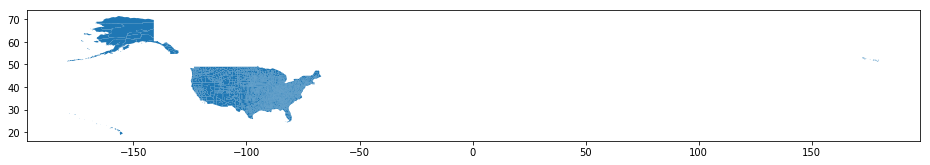

In [7]:
import matplotlib
%matplotlib inline



In [12]:
g = tracts.iloc[0].geometry

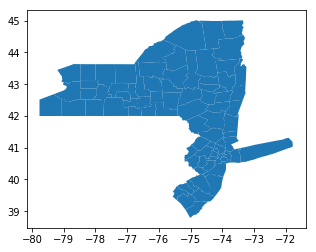

In [30]:
tracts[tracts["ANSI_ST"].isin(["34", "36"])].plot()

In [31]:
puma[puma["ORIG_STATE"].isin([34, 36]) & puma["DEST_STATE"].isin([34, 36])].head()

,SHIPMT_ID,ORIG_STATE,ORIG_MA,ORIG_CFS_AREA,DEST_STATE,DEST_MA,DEST_CFS_AREA,NAICS,QUARTER,SCTG,MODE,SHIPMT_VALUE,SHIPMT_WGHT,SHIPMT_DIST_GC,SHIPMT_DIST_ROUTED,TEMP_CNTL_YN,EXPORT_YN,EXPORT_CNTRY,HAZMAT,WGT_FACTOR
35,36,36,104,36-104,36,104,36-104,4238,2,24,5,308,16,17,21,N,N,N,N,309.0
74,75,36,408,36-408,34,408,34-408,4236,4,35,14,1100,5,17,24,N,N,N,N,274.9
96,97,36,99999,36-99999,36,99999,36-99999,323,2,29,5,409,94,11,11,N,N,N,N,893.9
114,115,36,408,36-408,34,408,34-408,322,4,24,4,764,373,18,23,N,N,N,N,279.8
157,158,36,99999,36-99999,36,99999,36-99999,4235,1,32,5,86,9,23,26,N,N,N,N,1176.1
